### Assignment 5.1

#### Load Dataset

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\cwnos\anaconda3\envs\Tensorflow_3_9_7\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\cwnos\anaconda3\envs\Tensorflow_3_9_7\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is 

In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

#### Prepare data - Encode integer sequences into binary matrix

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [4]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### Model Definintion

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) 

In [7]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

#### Setting asside validation sets

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Training Model

In [11]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4975 - acc: 0.7999 - val_loss: 0.3903 - val_acc: 0.8625
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2988 - acc: 0.9066 - val_loss: 0.3242 - val_acc: 0.8750
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2200 - acc: 0.9309 - val_loss: 0.2851 - val_acc: 0.8880
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1734 - acc: 0.9453 - val_loss: 0.2757 - val_acc: 0.8893
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1459 - acc: 0.9530 - val_loss: 0.3248 - val_acc: 0.8711
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1171 - acc: 0.9655 - val_loss: 0.2943 - val_acc: 0.8842
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1008 - acc: 0.9704 - val_loss: 0.3085 - val_acc: 0.8838
Epoch 8/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0802 - a

#### Plotting training and validation loss

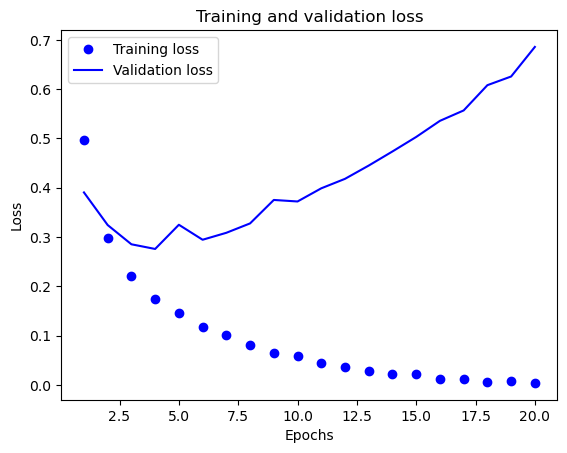

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Plotting training and validation accuracy

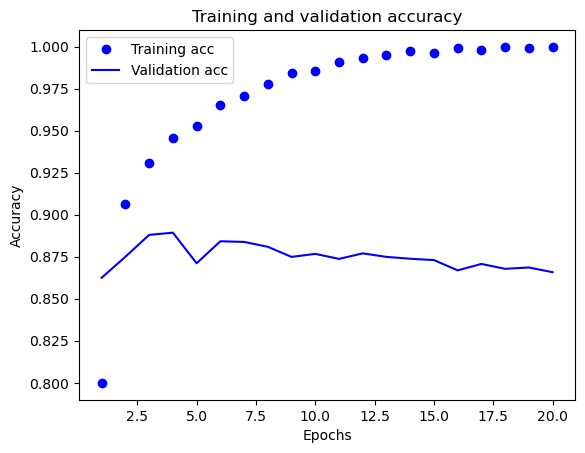

In [13]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### Retrain and run model with only 4 epochs 

In [14]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 0s 7ms/step - loss: 0.4369 - accuracy: 0.8185
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2491 - accuracy: 0.9118
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.1948 - accuracy: 0.9304
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3119 - accuracy: 0.8782


In [16]:
results

[0.31193143129348755, 0.8782399892807007]